In [1]:
# a = [1,2,3,4]
# b = a
# b.pop()
# print(b)
# print(a)
# =========================================
# a = [1,2,3,4]
# b = a.copy()
# b.pop()
# print(a)
# print(b)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv(r"C:\Users\Gitanshu\Downloads\credit-card-default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('defaulted', axis=1)
y = df['defaulted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24000, 24)
(24000,)
(6000, 24)
(6000,)


In [9]:
# Bagging classifier basically reduce the vairance for individual estimators, and make our model
#more generalize

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [10]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [11]:
print("Model test Score: %.3f, " %pipeline.score(X_test,y_test))
print("Model training Score: %.3f, " %pipeline.score(X_train,y_train))

Model test Score: 0.716, 
Model training Score: 1.000, 


In [12]:
from sklearn.ensemble import BaggingClassifier

bgclassifier = BaggingClassifier(estimator=pipeline, random_state=1)

bgclassifier.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('decisiontreeclassifier',
                                             DecisionTreeClassifier(random_state=1))]),
                  random_state=1)

In [13]:
print("Model test Score: %.3f, " %bgclassifier.score(X_test,y_test))
print("Model training Score: %.3f, " %bgclassifier.score(X_train,y_train))

Model test Score: 0.804, 
Model training Score: 0.982, 


In [14]:
# Tuning Bagging Classfier

from sklearn.model_selection import GridSearchCV

param_grid = {
               'n_estimators':[1, 5, 10, 15, 20],
               'max_samples':[0.05, 0.1, 0.2, 0.5],
               'max_features':[1, 5, 10, 15, 20]
             }

gs = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=1), param_grid, scoring='accuracy')

gs.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'max_features': [1, 5, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 5, 10, 15, 20]},
             scoring='accuracy')

In [15]:
print("Optimal Parameters", gs.best_params_)

Optimal Parameters {'max_features': 20, 'max_samples': 0.5, 'n_estimators': 20}


In [16]:
print("Mean cross validation Accuracy score: ", gs.best_score_)

Mean cross validation Accuracy score:  0.8120416666666666


In [17]:
bgclassifier = BaggingClassifier(DecisionTreeClassifier(max_depth=5), max_features = 20, max_samples=0.5, random_state=1)

bgclassifier.fit(X_train,y_train)

print("Model Test Score: %.3f" %bgclassifier.score(X_test, y_test), ", Model Traning Score %.3f" %bgclassifier.score(X_test, y_test))

Model Test Score: 0.816 , Model Traning Score 0.816


In [18]:
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [19]:
prediction = rfc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.67      0.36      0.46      1337

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000



In [21]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[4427  236]
 [ 862  475]]
0.817


In [22]:
# Hyper Parameter tuning RF

# Tuning Maximum Depth using KFOld

from sklearn.model_selection import KFold

n_folds=5

parameters = {
    'max_depth': range(2,20,5)
}

rf = RandomForestClassifier(random_state=1)

rf = GridSearchCV(rf, parameters, scoring='accuracy', return_train_score=True)

rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [23]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.889999,0.046146,0.013397,0.000485,2,{'max_depth': 2},0.805000,0.795833,0.799375,0.806042,0.806875,0.802625,0.004291,4,0.803698,0.805937,0.803333,0.801354,0.800417,0.802948,0.001929
1,2.343794,0.022303,0.029400,0.000495,7,{'max_depth': 7},0.818333,0.816250,0.816250,0.820625,0.826250,0.819542,0.003723,1,0.835677,0.835052,0.834792,0.835156,0.831510,0.834437,0.001492
2,3.883012,0.153924,0.046989,0.003527,12,{'max_depth': 12},0.819792,0.815417,0.816042,0.817500,0.826458,0.819042,0.004002,2,0.884479,0.883958,0.884583,0.883750,0.883177,0.883990,0.000512
3,4.864010,0.077570,0.066394,0.001962,17,{'max_depth': 17},0.816667,0.816458,0.818333,0.816875,0.826875,0.819042,0.003972,2,0.924583,0.929583,0.927500,0.925781,0.925052,0.926500,0.001833


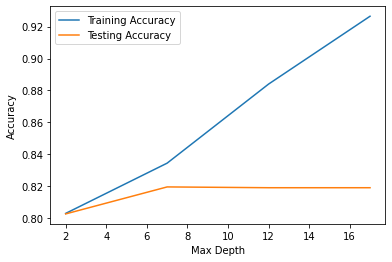

In [24]:
plt.figure()
plt.plot(scores['param_max_depth'],
        scores['mean_train_score'],
        label = "Training Accuracy")

plt.plot(scores['param_max_depth'],
        scores['mean_test_score'],
        label = "Testing Accuracy")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
# Tuning n_estimators

parameters = {'n_estimators': range(100,1500,400)}

rfc = RandomForestClassifier(max_depth=4, random_state=1)

rfc = GridSearchCV(rfc, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [26]:
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.504802,0.031899,0.018405,0.000479,100,{'n_estimators': 100},0.812708,0.808333,0.810208,0.816458,0.821250,0.813792,0.004616,1,0.816458,0.816823,0.815677,0.814583,0.813333,0.815375,0.001277
1,7.548915,0.131149,0.082988,0.002891,500,{'n_estimators': 500},0.811250,0.807083,0.808750,0.815417,0.819583,0.812417,0.004552,3,0.814896,0.816094,0.815156,0.813542,0.812969,0.814531,0.001130
2,13.438902,0.121076,0.142789,0.001928,900,{'n_estimators': 900},0.811458,0.807083,0.808750,0.816042,0.819167,0.812500,0.004505,2,0.814896,0.816198,0.815208,0.813385,0.812708,0.814479,0.001264
3,19.329349,0.110412,0.225388,0.040336,1300,{'n_estimators': 1300},0.810625,0.807083,0.808333,0.815417,0.818958,0.812083,0.004462,4,0.814740,0.815885,0.814896,0.812917,0.812396,0.814167,0.001305


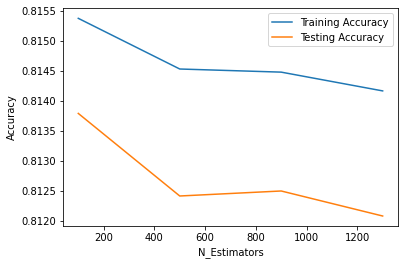

In [28]:
plt.figure()
plt.plot(scores['param_n_estimators'],
        scores['mean_train_score'],
        label = "Training Accuracy")

plt.plot(scores['param_n_estimators'],
        scores['mean_test_score'],
        label = "Testing Accuracy")

plt.xlabel("N_Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# Tuning Max_Features

parameters = {'max_features': [4,8,14,20,24]}

rfc = RandomForestClassifier(max_depth=4, random_state=1)

rfc = GridSearchCV(rfc, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [30]:
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.598712,0.043111,0.020406,0.002559,4,{'max_features': 4},0.812708,0.808333,0.810208,0.816458,0.821250,0.813792,0.004616,5,0.816458,0.816823,0.815677,0.814583,0.813333,0.815375,0.001277
1,2.758032,0.173357,0.021599,0.005747,8,{'max_features': 8},0.819375,0.819375,0.818958,0.821458,0.830417,0.821917,0.004339,1,0.824740,0.825000,0.823854,0.823646,0.821719,0.823792,0.001156
2,4.425199,0.019452,0.019200,0.002403,14,{'max_features': 14},0.818333,0.817917,0.818958,0.822500,0.831458,0.821833,0.005078,3,0.824948,0.825365,0.824688,0.824896,0.822604,0.824500,0.000973
3,6.245209,0.134121,0.018394,0.000493,20,{'max_features': 20},0.818958,0.818542,0.821250,0.821458,0.827917,0.821625,0.003358,4,0.825990,0.826250,0.825573,0.825833,0.823333,0.825396,0.001054
4,7.385314,0.125219,0.018391,0.000497,24,{'max_features': 24},0.819167,0.819792,0.819375,0.822917,0.828125,0.821875,0.003408,2,0.825885,0.826615,0.826302,0.825573,0.823177,0.825510,0.001219


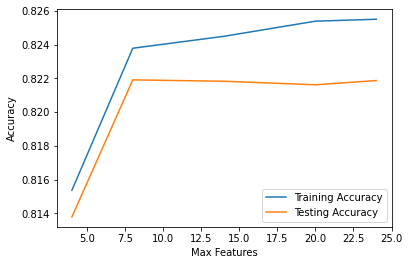

In [31]:
plt.figure()
plt.plot(scores['param_max_features'],
        scores['mean_train_score'],
        label = "Training Accuracy")

plt.plot(scores['param_max_features'],
        scores['mean_test_score'],
        label = "Testing Accuracy")

plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
# Tuning min_samples_leaf

parameters = {'min_samples_leaf': range(100,400,50)}

rfc = RandomForestClassifier(max_depth=4, random_state=1)

rfc = GridSearchCV(rfc, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [33]:
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.987448,0.166981,0.029167,0.010374,100,{'min_samples_leaf': 100},0.810417,0.807500,0.808125,0.815208,0.819583,0.812167,0.004592,1,0.813750,0.815677,0.814740,0.813333,0.811875,0.813875,0.001289
1,1.700050,0.014663,0.021966,0.000794,150,{'min_samples_leaf': 150},0.811250,0.806667,0.807917,0.815833,0.818958,0.812125,0.004663,2,0.813958,0.815052,0.813542,0.812344,0.811771,0.813333,0.001167
2,1.759589,0.157983,0.022793,0.001225,200,{'min_samples_leaf': 200},0.809792,0.806250,0.807708,0.813958,0.818542,0.811250,0.004476,3,0.813281,0.814427,0.812240,0.811406,0.810312,0.812333,0.001431
3,1.661319,0.009565,0.023265,0.001463,250,{'min_samples_leaf': 250},0.810208,0.803958,0.806667,0.815625,0.818333,0.810958,0.005369,4,0.812760,0.813958,0.813281,0.810937,0.810312,0.812250,0.001394
4,1.643896,0.008264,0.022807,0.001895,300,{'min_samples_leaf': 300},0.808958,0.804792,0.806875,0.816042,0.817083,0.810750,0.004936,5,0.812604,0.813281,0.813125,0.810885,0.809479,0.811875,0.001469


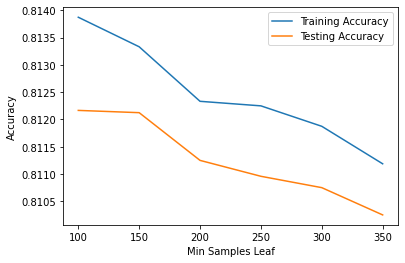

In [34]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_train_score'],
        label = "Training Accuracy")

plt.plot(scores['param_min_samples_leaf'],
        scores['mean_test_score'],
        label = "Testing Accuracy")

plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
# Tuning with min_sample_split

parameters = {'min_samples_split': range(200,500,50)}

rfc = RandomForestClassifier(max_depth=4, random_state=1)

rfc = GridSearchCV(rfc, parameters, cv=n_folds, scoring='accuracy', return_train_score=True)

rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [36]:
scores = rfc.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.627402,0.070107,0.019997,0.002177,200,{'min_samples_split': 200},0.811667,0.808542,0.808125,0.815833,0.820833,0.813000,0.004792,4,0.815260,0.816510,0.815573,0.814167,0.812448,0.814792,0.001391
1,1.517997,0.060711,0.021003,0.005012,250,{'min_samples_split': 250},0.811458,0.809583,0.808333,0.815833,0.820208,0.813083,0.004377,2,0.815000,0.816510,0.814740,0.813542,0.812396,0.814438,0.001391
2,1.454200,0.008770,0.018409,0.000500,300,{'min_samples_split': 300},0.811250,0.808958,0.808333,0.816042,0.820417,0.813000,0.004592,3,0.814896,0.816354,0.814688,0.813906,0.812552,0.814479,0.001247
3,1.457810,0.005103,0.018396,0.000490,350,{'min_samples_split': 350},0.811875,0.809375,0.808333,0.816458,0.820000,0.813208,0.004403,1,0.814740,0.816198,0.814844,0.813906,0.812396,0.814417,0.001249
4,1.452809,0.006443,0.018403,0.000485,400,{'min_samples_split': 400},0.811458,0.808333,0.808542,0.815625,0.819583,0.812708,0.004332,5,0.814688,0.815885,0.814427,0.813125,0.812187,0.814063,0.001284


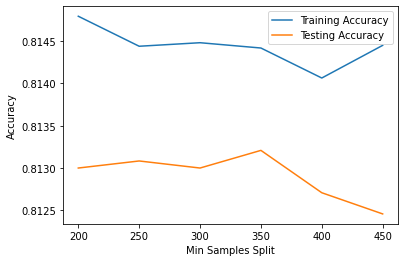

In [37]:
plt.figure()
plt.plot(scores['param_min_samples_split'],
        scores['mean_train_score'],
        label = "Training Accuracy")

plt.plot(scores['param_min_samples_split'],
        scores['mean_test_score'],
        label = "Testing Accuracy")

plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# Random Search to find Optimal Hyperparameters

from sklearn.model_selection import RandomizedSearchCV

In [40]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators': [100,200,300],
    'max_features': [5,10]
}


rf = RandomForestClassifier(random_state=1)

rs = RandomizedSearchCV(rf, param_distributions=param_grid, random_state=1)

In [41]:
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   random_state=1)

In [46]:
print('We can get Accuracy of %.3f' %rs.best_score_ ,
      'using', rs.best_params_)

We can get Accuracy of 0.821 using {'n_estimators': 200, 'min_samples_split': 200, 'min_samples_leaf': 300, 'max_features': 10, 'max_depth': 4}


In [48]:
rfc = RandomForestClassifier(n_estimators = 200, 
                             min_samples_split = 200, 
                             min_samples_leaf = 300, 
                             max_features = 10, 
                             max_depth = 4, random_state=1)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=10, min_samples_leaf=300,
                       min_samples_split=200, n_estimators=200, random_state=1)

In [50]:
predictions = rfc.predict(X_test)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.68      0.35      0.46      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.79      6000



In [52]:
print(confusion_matrix(y_test,predictions))

[[4445  218]
 [ 873  464]]


In [54]:
print('%.3f'%accuracy_score(y_test,predictions))

0.818
